# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [108]:
# Libraries for data loading, data manipulation and data visulisation


# Libraries for data preparation and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting global constants to ensure notebook results are reproducible
###PARAMETER_CONSTANT = ###
import sklearn
PARAMETER_CONSTANT =42
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns
#import matplotlib.pyplot as plt

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
    #    print(os.path.join(dirname, filename))

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [109]:
#Loading the dataset
df_train = pd.read_csv("df_train.csv") 
df_test = pd.read_csv("df_test.csv")

In [110]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [111]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [112]:
df = pd.concat([df_train,df_test])
df.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [113]:
# look at data statistics
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,11682.000000,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [114]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [116]:
df['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [117]:
df['Valencia_wind_deg']=df['Valencia_wind_deg'].str.extract('(\d+)')##removes strings

In [118]:
df['Valencia_wind_deg']=pd. to_numeric(df['Valencia_wind_deg'])##changes from object to int

In [119]:
df['Valencia_wind_deg']


0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [120]:
df.Seville_pressure = df.Seville_pressure.str.extract('(\d+)')

In [121]:
df.Seville_pressure = pd.to_numeric(df.Seville_pressure)

In [122]:
df.Seville_pressure


0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [123]:
df.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg         int64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure          int64
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [124]:
df_clean = df.drop(['time' , 'Unnamed: 0'], axis = 1)##dropping the two columns

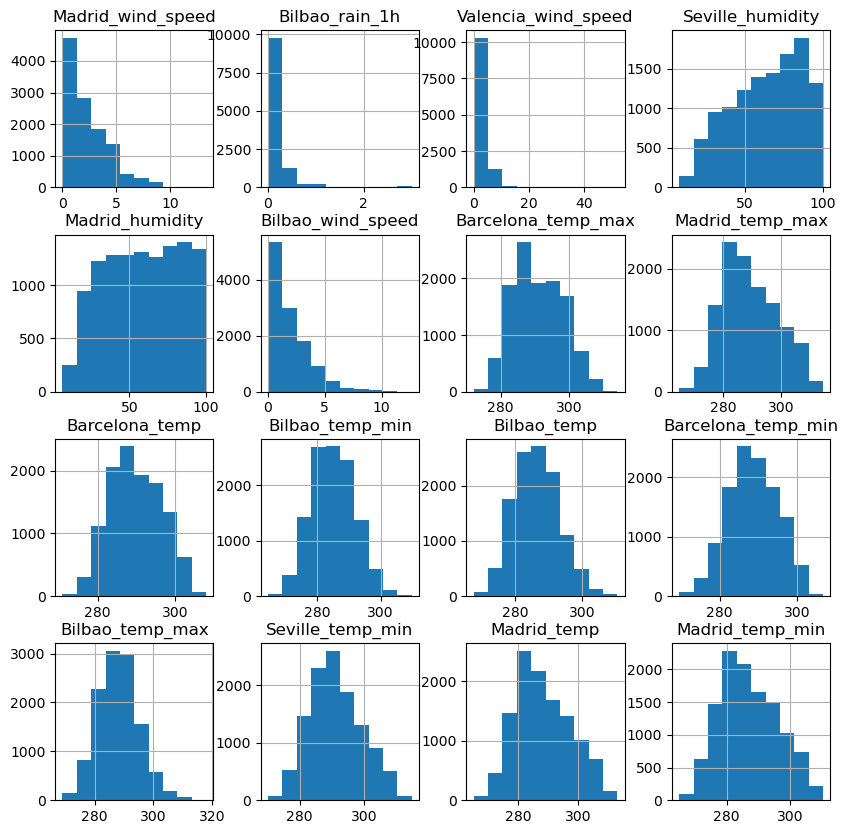

In [125]:
# plot relevant feature interactions
features =["Madrid_wind_speed","Bilbao_rain_1h","Valencia_wind_speed","Seville_humidity","Madrid_humidity","Bilbao_wind_speed","Barcelona_temp_max","Madrid_temp_max","Barcelona_temp","Bilbao_temp_min","Bilbao_temp","Barcelona_temp_min","Bilbao_temp_max","Seville_temp_min","Madrid_temp","Madrid_temp_min"]
df_clean[features].hist(figsize=(10,10));

In [126]:
# evaluate correlation
df_clean.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.112011,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,...,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Valencia_wind_deg,0.112011,1.000000,0.174800,0.270834,0.276979,0.291152,0.143733,0.071520,0.082175,0.113183,...,-0.368756,-0.294921,-0.301837,-0.310330,-0.277645,-0.308790,-0.346848,-0.364499,-0.345021,-0.188674
Bilbao_rain_1h,0.247761,0.174800,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,...,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,-0.152510
Valencia_wind_speed,0.524549,0.270834,0.240118,1.000000,-0.095533,-0.029066,0.192272,0.398683,0.146475,0.255511,...,-0.020645,-0.016290,-0.002094,-0.014087,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.142791
Seville_humidity,-0.114347,0.276979,0.063048,-0.095533,1.000000,0.794435,0.055132,-0.096654,0.397249,-0.118299,...,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,-0.167290
Madrid_humidity,-0.116172,0.291152,0.098192,-0.029066,0.794435,1.000000,0.033094,-0.012729,0.363340,-0.091650,...,-0.798668,-0.677792,-0.626489,-0.620312,-0.636039,-0.590620,-0.764148,-0.795066,-0.757692,-0.150536
Bilbao_clouds_all,0.225566,0.143733,0.361385,0.192272,0.055132,0.033094,1.000000,0.024394,0.037675,0.267920,...,-0.060564,-0.035391,-0.082353,-0.126287,-0.025979,-0.170196,-0.089831,-0.059928,-0.060271,-0.127293
Bilbao_wind_speed,0.382617,0.071520,0.075120,0.398683,-0.096654,-0.012729,0.024394,1.000000,0.132678,0.440740,...,0.015822,0.008407,0.098830,0.131612,0.016688,0.166347,0.047191,0.019764,0.006009,-0.081602
Seville_clouds_all,0.185177,0.082175,0.074137,0.146475,0.397249,0.363340,0.037675,0.132678,1.000000,0.042427,...,-0.231967,-0.178549,-0.132287,-0.144719,-0.150584,-0.152165,-0.194561,-0.222425,-0.213539,-0.091804
Bilbao_wind_deg,0.272466,0.113183,0.255858,0.255511,-0.118299,-0.091650,0.267920,0.440740,0.042427,1.000000,...,0.051832,0.080329,0.110097,0.084298,0.094344,0.052073,0.080600,0.063938,0.062808,-0.120800


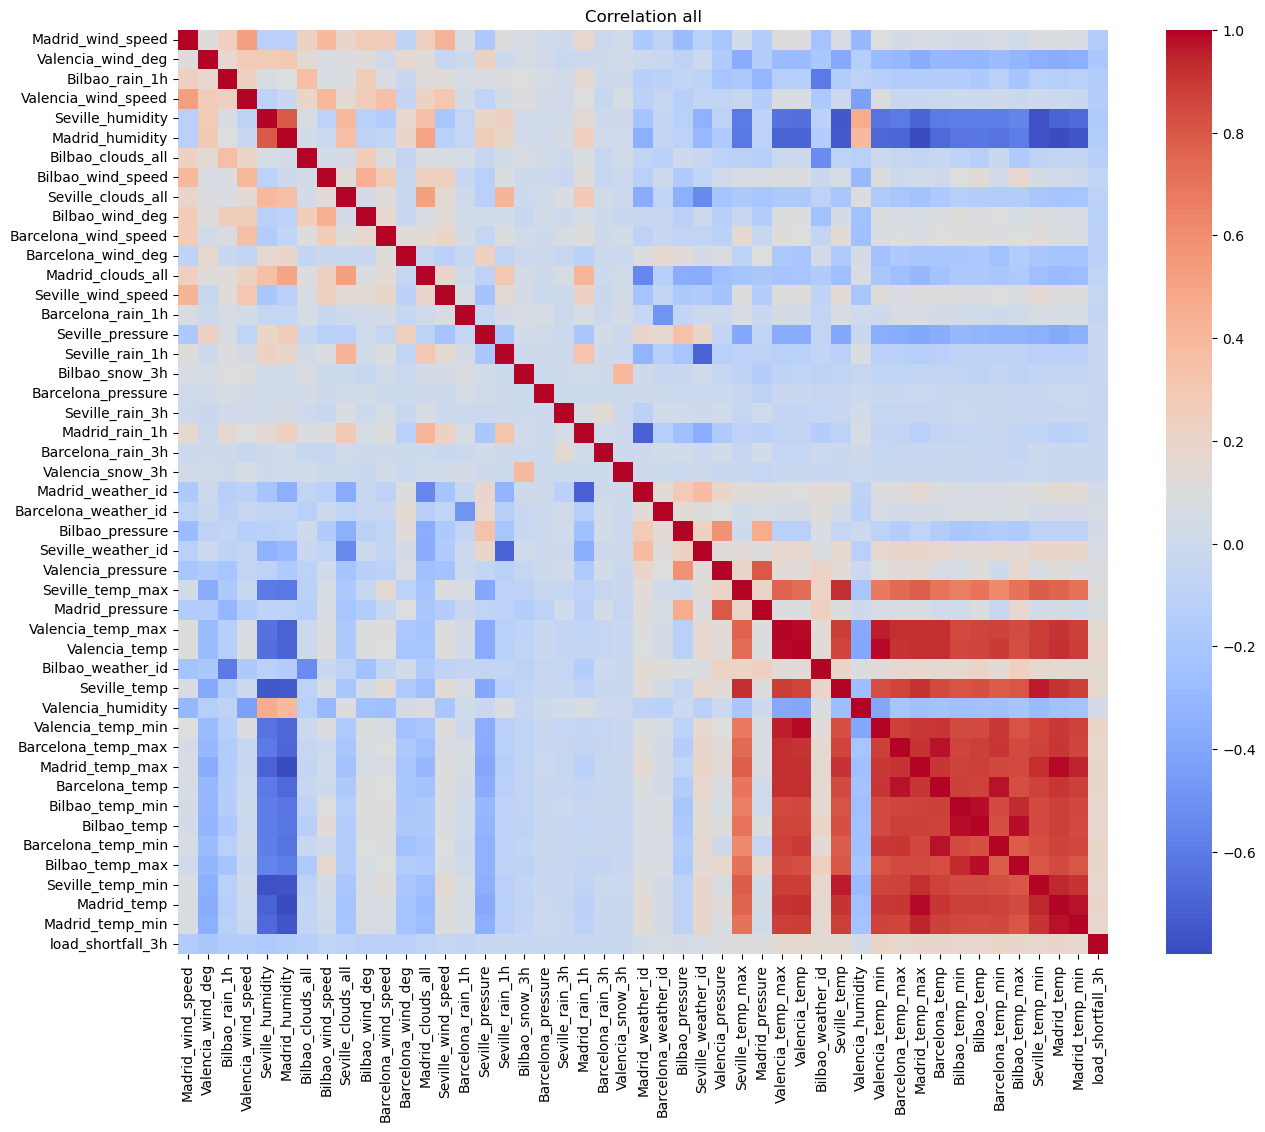

In [127]:
fig = plt.figure(figsize=(15,12));
ax = fig.add_subplot(111);
relation=df_clean.corr()

sns.heatmap(relation, cmap='coolwarm', ax=ax)

plt.title('Correlation all')
plt.show()

In [128]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [129]:
# remove missing values/ features
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [130]:
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.3466870428985
Median
1015.0


In [131]:
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])

In [132]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [133]:
df.time

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 11683, dtype: object

In [134]:
# create new features

In [135]:
# engineer existing features
df['time'] = pd.to_datetime(df['time'])

In [136]:
df.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

In [137]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

In [138]:
df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour,minute,second
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,0,0
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,0,0
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,0,0
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12,0,0
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,274.910000,271.150000,NaN,2018,12,31,9,0,0
2916,11679,2018-12-31 12:00:00,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.150000,283.156667,280.483333,NaN,2018,12,31,12,0,0
2917,11680,2018-12-31 15:00:00,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,290.816667,287.733333,286.483333,NaN,2018,12,31,15,0,0
2918,11681,2018-12-31 18:00:00,1.000000,6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,287.483333,283.813333,282.150000,NaN,2018,12,31,18,0,0


In [139]:
df = df.drop(['time' , 'Unnamed: 0'], axis = 1)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LinearRegression, Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV 
from sklearn.ensemble import RandomForestRegressor

In [141]:
# split data

In [142]:
# create targets and features dataset
y = df[:len(df_train)][['load_shortfall_3h']]
x = df[:len(df_train)].drop('load_shortfall_3h' , axis = 1)

x_train = df[:len(df_train)].drop('load_shortfall_3h' , axis = 1)
x_test = df[len(df_train):].drop('load_shortfall_3h' , axis = 1)

In [143]:
# create one or more ML models
RF = RandomForestRegressor()

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2)

In [145]:
RF.fit(x_train,y_train)
preds = RF.predict(x_test)

C:\Users\tlotl\AppData\Local\Temp\ipykernel_28196\2625252778.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train,y_train)


In [146]:
# evaluate one or more ML models
def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test,y_preds))

In [147]:
rmse(y_test, preds)

3049.8369010838837

In [148]:
from sklearn.metrics import r2_score

In [149]:
r2_score(y_test, preds)

0.6535503836619061

In [150]:
x_train = df[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test =df[len(df_train):].drop('load_shortfall_3h',axis=1)

In [151]:
RF.fit(x_train,y)

preds = RF.predict(x_test)

C:\Users\tlotl\AppData\Local\Temp\ipykernel_28196\892073368.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train,y)


In [152]:
res= pd.DataFrame(preds, columns = ['load_shortfall_3h'])
res.head()

,load_shortfall_3h
0,10680.533333
1,7647.273333
2,6876.153333
3,9691.813333
4,12837.160000


In [153]:
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(res)
submission.to_csv('submission.csv',index =False)

In [154]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10680.533333
1,2018-01-01 03:00:00,7647.273333
2,2018-01-01 06:00:00,6876.153333
3,2018-01-01 09:00:00,9691.813333
4,2018-01-01 12:00:00,12837.160000
...,...,...
2915,2018-12-31 09:00:00,14770.540000
2916,2018-12-31 12:00:00,12574.060000
2917,2018-12-31 15:00:00,12412.316667
2918,2018-12-31 18:00:00,13812.806667


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [155]:
# Compare model performance

In [156]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [157]:
# discuss chosen methods logic